In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
credit_card_data = pd.read_csv('creditcard.csv')
df = credit_card_data.copy()

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Highly imbalanced data

In [9]:
legit = df[df.Class == 0]
fraud = df[df.Class == 1]

In [10]:
legit.shape, fraud.shape

((284315, 31), (492, 31))

In [11]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [13]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [14]:
# compare the values for both transactions
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


### Undersampling

In [15]:
legit_sample = legit.sample(n=492) # minority class has 492 data points

In [16]:
# Concatenate the two dataframes
new_df = pd.concat([legit_sample, fraud], axis = 0)

In [17]:
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
134178,80687.0,-1.993418,-0.884966,1.934351,-0.643515,-0.227398,-0.649888,-0.741731,0.816775,0.365259,...,0.067439,-0.365800,0.018147,0.383311,-0.182462,0.754372,-0.109344,-0.171875,59.29,0
270453,164085.0,-0.391175,-3.522028,-0.636303,4.313653,-0.858793,3.046301,0.120011,0.568104,-0.391592,...,0.977816,0.536838,-0.701757,-1.598253,-1.039972,-0.033475,-0.107862,0.145837,1089.47,0
260497,159584.0,0.121679,0.968533,-0.504975,-0.722191,1.091455,-0.352835,0.864238,0.059721,-0.272083,...,-0.309094,-0.783341,0.052404,0.244136,-0.416561,0.112572,0.217021,0.071175,4.47,0
162197,114916.0,1.992277,-1.270191,-0.793391,-1.067322,-0.760908,0.191974,-1.010215,0.120068,-0.141666,...,0.018754,-0.206980,0.268549,0.166308,-0.475518,-0.514591,-0.014269,-0.033435,99.00,0
22413,32233.0,-1.688061,1.048390,1.551111,-0.790977,-1.054468,-0.802757,0.127652,0.328061,1.123881,...,-0.019662,0.489916,-0.110305,0.789533,-0.067350,0.961328,0.335904,0.101071,33.01,0


In [18]:
new_df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [19]:
new_df.Class.value_counts()

1    492
0    492
Name: Class, dtype: int64

In [20]:
new_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,100642.835366,0.028671,0.038220,-0.229376,0.023512,0.032173,-0.026088,0.091108,-0.085430,-0.028635,...,-0.028394,0.030572,0.043655,-0.037897,0.016889,0.019131,0.019294,0.012283,-0.000979,102.830772
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [21]:
X = new_df.drop('Class', axis = 1)
y = new_df.Class

In [22]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
134178,80687.0,-1.993418,-0.884966,1.934351,-0.643515,-0.227398,-0.649888,-0.741731,0.816775,0.365259,...,0.207215,0.067439,-0.365800,0.018147,0.383311,-0.182462,0.754372,-0.109344,-0.171875,59.29
270453,164085.0,-0.391175,-3.522028,-0.636303,4.313653,-0.858793,3.046301,0.120011,0.568104,-0.391592,...,1.915922,0.977816,0.536838,-0.701757,-1.598253,-1.039972,-0.033475,-0.107862,0.145837,1089.47
260497,159584.0,0.121679,0.968533,-0.504975,-0.722191,1.091455,-0.352835,0.864238,0.059721,-0.272083,...,0.034803,-0.309094,-0.783341,0.052404,0.244136,-0.416561,0.112572,0.217021,0.071175,4.47
162197,114916.0,1.992277,-1.270191,-0.793391,-1.067322,-0.760908,0.191974,-1.010215,0.120068,-0.141666,...,0.194805,0.018754,-0.206980,0.268549,0.166308,-0.475518,-0.514591,-0.014269,-0.033435,99.00
22413,32233.0,-1.688061,1.048390,1.551111,-0.790977,-1.054468,-0.802757,0.127652,0.328061,1.123881,...,0.285986,-0.019662,0.489916,-0.110305,0.789533,-0.067350,0.961328,0.335904,0.101071,33.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [23]:
y

134178    0
270453    0
260497    0
162197    0
22413     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64

In [24]:
# Split the dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)

In [25]:
X.shape, X_train.shape, X_test.shape

((984, 30), (787, 30), (197, 30))

In [26]:
y.shape, y_train.shape, y_test.shape

((984,), (787,), (197,))

In [27]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()

In [28]:
lr_model.fit(X_train, y_train)

LogisticRegression()

In [31]:
y_train_pred = lr_model.predict(X_train)
train_acc_score = accuracy_score(y_train_pred, y_train)
train_acc_score

0.928843710292249

In [34]:
# Evaluation

y_test_pred = lr_model.predict(X_test)
test_acc_score = accuracy_score(y_test_pred, y_test)

In [36]:
test_acc_score

0.9593908629441624

The performance of model on test set is better than train set.Its what we hope for but the model is underfitting the train set.If we improve our model , we might end up with even higher test accuracy

In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score

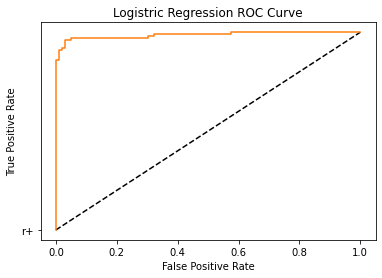

In [41]:
# Lastly will plot a ROC Curve
# calculating the probabilities
y_pred_prob = lr_model.predict_proba(X_test)[:,1]

# instantiating the roc_cruve
fpr,tpr,threshols=roc_curve(y_test,y_pred_prob)

# plotting the curve
plt.plot([0,1],[0,1],"k--",'r+')
figsize=(16,12)
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistric Regression ROC Curve")
plt.show()